In [ ]:
# Installing kaggle library
! pip install kaggle

In [ ]:
# First go to create new API on kaggle account to download kaggle.json file
# Uploading kaggle.json file from local to working directory

In [ ]:
# configuring the path of kaggle.json file
! mkdir -p ~/.kaggle/
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Importing twitter sentiment dataset, for this first copy the API command from kaggle account and then put ! and paste
# API to fetch the dataset from kaggle
! kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Extracting the compressed(zip) dataset file
from zipfile import ZipFile
dataset = '/content/sentiment140.zip' # path

# Open/read zip file
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [67]:
# Importing the dependencies
import numpy as np
import pandas as pd
import re # re for regular expression
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # reduce the word to root word
from sklearn.feature_extraction.text import TfidfVectorizer # convert text to numerical features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [68]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
# Printing stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [70]:
# Data Processing

# Loading the data from csv file to pandas dataframe
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')

In [71]:
# Checking the number of rows and columns
twitter_data.shape

(1599999, 6)

In [72]:
# Printing the first 5 rows of dataframe
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [73]:
# Naming the columns and reading the dataset again
column_names = ['target','id', 'date', 'flag', 'user', 'text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names= column_names,  encoding='ISO-8859-1')

In [74]:
# Checking the number of rows and columns
twitter_data.shape

(1600000, 6)

In [75]:
# Printing the first 5 rows of dataframe
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [76]:
# Counting the number of missing values in the dataset
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [77]:
# Checking the distribution of target column
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [78]:
# Convert the target(label) 4 to 1
twitter_data.replace({'target':{4:1}}, inplace=True)

In [79]:
# Checking the distribution of target column
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [136]:
# Split training data randomly
# Target 0: 50000
# Target 1:50000

# # Sample 100,000 entries
# df_sampled = twitter_data.sample(n=100000//2, random_state=42)

# # Save the sampled dataset to a new CSV file
# sampled_file_path = 'sentiment140_sampled.csv'
# df_sampled.to_csv(sampled_file_path, index=False, encoding='latin-1')


In [135]:
# Split training data into equal proportion
# Target 0: 50000
# Target 1:50000

In [82]:
# Identify unique labels and their counts
target_counts = twitter_data['target'].value_counts()
unique_targets = target_counts.index.tolist()

# Calculate target count per label for the reduced dataset (1 lakh rows)
total_target_count = 100000  # 1 lakh
target_count_per_target = total_target_count // len(unique_targets)

# Create an empty DataFrame to store the reduced dataset
reduced_df = pd.DataFrame()

# Iterate through each label and sample rows to meet the target count per label
for target in unique_targets:
    target_data = twitter_data[twitter_data['target'] == target].sample(n=target_count_per_target)
    reduced_df = pd.concat([reduced_df, target_data])

# If the total count is not exactly 1 lakh, randomly sample the remaining rows to fill the gap
remaining_count = total_target_count - len(reduced_df)
if remaining_count > 0:
    remaining_data = twitter_data.sample(n=remaining_count)
    reduced_df = pd.concat([reduced_df, remaining_data])

# Reset the index of the reduced DataFrame
reduced_df.reset_index(drop=True, inplace=True)

# Write the reduced DataFrame to a new CSV file
reduced_df.to_csv('sentiment140.csv', index=False)

In [85]:
reduced_df.shape

(100000, 6)

In [86]:
# Checking the distribution of target column
reduced_df['target'].value_counts()

target
0    50000
1    50000
Name: count, dtype: int64

In [88]:
# 0 --> Negative tweet
# 1 --> Positive tweet

# Stemming --> Process of reducing the words to its keywords
# Eg. actor, actress, acting = act
port_stem = PorterStemmer()


In [89]:
def stemming(content): # Here, the content is each tweet
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content) # remove all tweet if it doesn't belong to a-zA-Z alphabet i.e remove all the punctuation and special characters
  stemmed_content = stemmed_content.lower()  # converting all the letters to lowercase letters
  stemmed_content = stemmed_content.split()  # split all the word in a tweet and put that in a list
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content) # joining all the tweets together

  return stemmed_content

In [93]:
# twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming) # takes 50 minutes to complete this execution

reduced_df['stemmed_content'] = reduced_df['text'].apply(stemming) # takes 50 minutes to complete this execution

In [92]:
# twitter_data.head()

In [137]:
# print(twitter_data['stemmed_content'])

print(reduced_df['stemmed_content'])


0                                                knee hurt
1                         dreamscometru still littl queasi
2                 think dog hate want walk still work hate
3        spicyicecream done use get earli eat breakfast...
4                                      dannymcfli im jelou
                               ...                        
99995                                    sczepanski agre x
99996    product friday night found old song lost docum...
99997                          go lunch sissi awhil j come
99998    let rephras last joke dane funni nfl blitz som...
99999                    u new zealand best well realli ay
Name: stemmed_content, Length: 100000, dtype: object


In [139]:
# print(twitter_data['target'])

In [138]:
# # separating data and label
# X = twitter_data['stemmed_content'].values
# Y = twitter_data['target'].values

X = reduced_df['stemmed_content'].values
Y = reduced_df['target'].values

In [97]:
print(X)

['knee hurt' 'dreamscometru still littl queasi'
 'think dog hate want walk still work hate' ...
 'go lunch sissi awhil j come'
 'let rephras last joke dane funni nfl blitz somethin bad ass time row fire'
 'u new zealand best well realli ay']


In [98]:
print(Y)

[0 0 0 ... 1 1 1]


In [99]:
# splitting the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)  # stratify means split into equal proportions

In [100]:
print(X.shape, X_train.shape, X_test.shape)

(100000,) (80000,) (20000,)


In [101]:
print(X_train)

['rmbmynam wanna watch watch bluray'
 'airport corpu hope last time long time hate'
 'cucchiaio good morn cucchiaio day b decid want dismal nice either' ...
 'dont like best friend sad'
 'vgirl think im ff sieep nice havin chat u great time night'
 'visit wale us free http www squidoo com portmeirion wale enjoy promis']


In [102]:
print(X_test)

['frankychaira im gonna sue defam good name wow feel strongli subject'
 'aravindjos yeah that one pull up reach place ad get trigger one stop'
 'finish day phew enough summar alreadi tv time go del potro' ...
 'back elton amaz live play two half hour break guy legend'
 'soozafritz ughh come later terribl lone' 'nassauct show us pic']


In [103]:
# Converting the textual data into numerical data --> feature extraction using vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train) # fit and transform train data
X_test = vectorizer.transform(X_test) # only transform test data

In [104]:
print(X_train)

  (0, 6630)	0.5771923974673872
  (0, 63131)	0.47534525491775553
  (0, 63034)	0.2883865590692688
  (0, 49031)	0.5981045205323321
  (1, 23481)	0.28239815365618925
  (1, 34244)	0.2957975678532802
  (1, 58881)	0.45316234507217773
  (1, 32569)	0.257602778774404
  (1, 24865)	0.24611787070314303
  (1, 11909)	0.5840212304689654
  (1, 1116)	0.3992304786988535
  (2, 16788)	0.22656810214868223
  (2, 41094)	0.1804830977014496
  (2, 14922)	0.3739486901276828
  (2, 63043)	0.14855632418907355
  (2, 13891)	0.24377780886421524
  (2, 13603)	0.1285859234959138
  (2, 39067)	0.1664860096416032
  (2, 21985)	0.13333636772371413
  (2, 12601)	0.7954420180302157
  (3, 63078)	0.42653991788017837
  (3, 57728)	0.20710442688833508
  (3, 51310)	0.21400692353439504
  (3, 44245)	0.32523221524575996
  (3, 21970)	0.2505247177576871
  :	:
  (79997, 20203)	0.451771503275237
  (79997, 33489)	0.35546398522444506
  (79997, 50067)	0.438230556063811
  (79998, 52653)	0.4821009797477858
  (79998, 62265)	0.4821009797477858
  (799

In [105]:
print(X_test)

  (0, 64632)	0.2815540060926241
  (0, 55791)	0.4681291214252463
  (0, 55709)	0.427420531820071
  (0, 55562)	0.48951908869683386
  (0, 40299)	0.3061758221969219
  (0, 26062)	0.21352820145747203
  (0, 21985)	0.18398758241877858
  (0, 21970)	0.24615294321216888
  (0, 18860)	0.21327116367419857
  (1, 65601)	0.19605347204289822
  (1, 61576)	0.3283529621948267
  (1, 60017)	0.3960030533237652
  (1, 57774)	0.2250321336563542
  (1, 55400)	0.22607875112783074
  (1, 47753)	0.3009006307532433
  (1, 46607)	0.28006996446854154
  (1, 45287)	0.23641821938769245
  (1, 42839)	0.3236613945237389
  (1, 21270)	0.1372876771412022
  (1, 3086)	0.4149432925101337
  (1, 508)	0.2729860757328589
  (2, 60436)	0.28696040020777586
  (2, 58881)	0.18596021281097624
  (2, 55904)	0.5097900630209946
  (2, 44787)	0.40856813429607003
  :	:
  (19996, 26755)	0.30326173663659306
  (19996, 26586)	0.33316493472854786
  (19996, 22367)	0.23311228818384164
  (19996, 5684)	0.2668328275915353
  (19996, 2949)	0.3402854888599769
  (19

In [106]:
# Training the machine learning model --> logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train) # takes some time

LogisticRegression(max_iter=1000)

In [107]:
# Model evalution
# Accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [109]:
print('Accuracy score on the training data :', training_data_accuracy*100, '%')

Accuracy score on the training data : 82.67375 %


In [110]:
# Accuracy score on the testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [111]:
print('Accuracy score on the test data :', test_data_accuracy*100, '%') # Model accuracy

Accuracy score on the test data : 75.67 %


In [123]:
# Calculate evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(Y_test, X_test_prediction)
print(f"Precision: {precision*100}%")

# Calculate recall
recall = recall_score(Y_test, X_test_prediction)
print(f"Recall: {recall*100}%")

# Calculate f1-score
f1_score = f1_score(Y_test, X_test_prediction)
print(f"F1-Score: {f1_score*100}%")

Precision: 74.90782068697845%
Recall: 77.2%
F1-Score: 76.0366394169211%


In [128]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, X_test_prediction)
cm

array([[7414, 2586],
       [2280, 7720]])

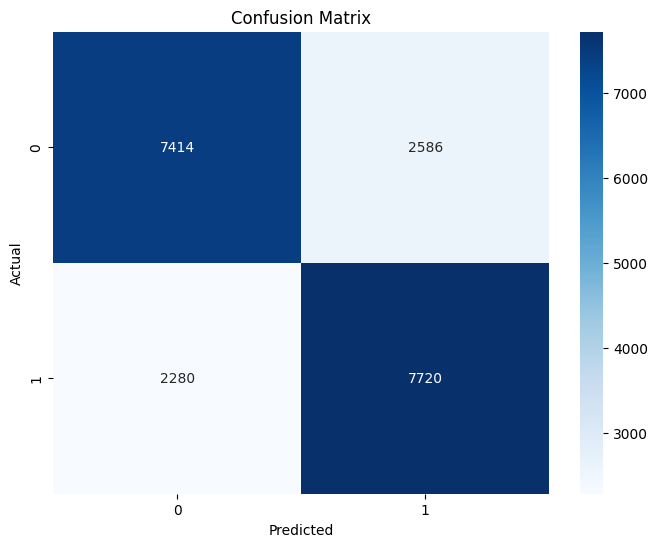

In [129]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [130]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     10000
           1       0.75      0.77      0.76     10000

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



In [131]:
# Saving the trained model
import pickle
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb')) # writing the model

In [132]:
# Using the saved model for future predictions
# Loading the saved model
loaded_model = pickle.load(open('/content/trained_model.sav', 'rb')) # reading model

In [133]:
# Prediction for test data
X_new = X_test[200]
print(Y_test[200])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('Negative Tweet')
else:
  print('Postive Tweet')


0
[1]
Postive Tweet


In [134]:
# Function to predict sentiment for user input
def predict_sentiment(text):
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)
    return 'Positive' if prediction == 1 else 'Negative'

# User input text
user_input = input("Enter the text to check sentiment : ")
# print(f"User Input: {user_input}")
print(f"Sentiment: {predict_sentiment(user_input)}")

Enter the text to check sentiment : I love this movie! It's fantastic.
Sentiment: Positive
